Q1 : Password Hacking

In [1]:
import hashlib
import bcrypt

In [2]:
# SHA1 
m=hashlib.sha1(b"Chulalongkorn").hexdigest() 
print(m)

ca8a68498ae67cd14c15f5ebf043633224005759


In [3]:
# MD5 
m=hashlib.md5(b"Chulalongkorn").hexdigest() 
print(m)

46fa3b56c660faff420190c18c98a56b


In [4]:
# BCRYPT 
salt = bcrypt.gensalt() 
m=bcrypt.hashpw(b"Chulalongkorn", salt)
print(m)
print(m.decode())

b'$2b$12$XzvDWLOSF51mzx7Y8bLg2.BoxL56U3ekc3NLFz6Ql3QawJ5jLqyve'
$2b$12$XzvDWLOSF51mzx7Y8bLg2.BoxL56U3ekc3NLFz6Ql3QawJ5jLqyve


In [9]:
import requests

In [10]:
url = "https://raw.githubusercontent.com/danielmiessler/SecLists/master/Passwords/Common-Credentials/10k-most-common.txt"
r = requests.get(url, timeout=30)
r.raise_for_status()
with open("10k-most-common.txt", "wb") as f:
    f.write(r.content)

In [14]:
import itertools

In [44]:
def substitutions(word: str):
    subs = {
        "o": "0",
        "l": "1",
        "i": "1",
    }
    choices = []
    for ch in word:
        choices.append(
            ([ch, ch.upper()] if ch.isalpha() else [ch]) + ([subs[ch]] if ch in subs else [])
        )
    return ["".join(combo) for combo in itertools.product(*choices)]

In [45]:
print(substitutions("lol"))

['lol', 'loL', 'lo1', 'lOl', 'lOL', 'lO1', 'l0l', 'l0L', 'l01', 'Lol', 'LoL', 'Lo1', 'LOl', 'LOL', 'LO1', 'L0l', 'L0L', 'L01', '1ol', '1oL', '1o1', '1Ol', '1OL', '1O1', '10l', '10L', '101']


In [46]:
passwords = []
with open("10k-most-common.txt", "r", encoding="utf-8", errors="ignore") as f:
    for line in f:
        pw = line.strip()
        if not pw:
            continue
        passwords.extend(set(substitutions(pw)))

In [47]:
print(len(passwords))

2653144


In [48]:
goal = "d54cc1fe76f5186380a0939d2fc1723c44e8a5f7"

In [49]:
import tqdm
from tqdm import tqdm

In [50]:
hash2password = {}
for pw in tqdm(passwords, desc="Trying words"):
    h = hashlib.sha1(pw.encode()).hexdigest()
    hash2password[h] = pw

Trying words: 100%|██████████| 2653144/2653144 [00:02<00:00, 948807.01it/s]


In [51]:
print(f"password for {goal} is {hash2password.get(goal, 'not found')}")

password for d54cc1fe76f5186380a0939d2fc1723c44e8a5f7 is ThaiLanD


Q2 : Time Used

In [55]:
import time

In [54]:
algos = {
    "MD5": hashlib.md5,
    "SHA1": hashlib.sha1,
    "SHA256": hashlib.sha256,
    "SHA512": hashlib.sha512
}

In [57]:
password = b"Chulalongkorn"
duration = 5  # seconds

In [58]:
results = {}

for name, func in algos.items():
    start = time.time()
    count = 0
    while time.time() - start < duration:
        h = func(password).digest()
        count += 1
    results[name] = count

In [60]:
salt = bcrypt.gensalt()
start = time.time()
count = 0
while time.time() - start < duration:
    h = bcrypt.hashpw(password, salt)
    count += 1
results["bcrypt"] = count

In [61]:
results

{'MD5': 8371537,
 'SHA1': 8762368,
 'SHA256': 8927790,
 'SHA512': 6857115,
 'bcrypt': 25}

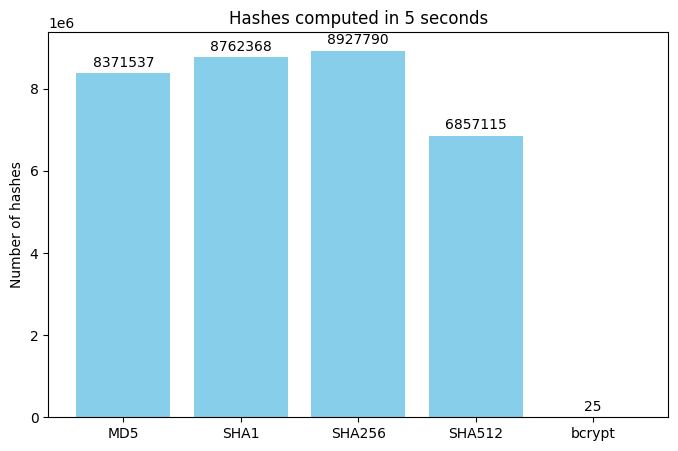

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(list(results.items()), columns=["Algorithm","Hashes"])

plt.figure(figsize=(8,5))
plt.bar(df["Algorithm"], df["Hashes"], color="skyblue")
plt.title(f"Hashes computed in {duration} seconds")
plt.ylabel("Number of hashes")

for idx, row in df.iterrows():
    plt.text(row["Algorithm"], row["Hashes"] + df["Hashes"].max()*0.01, str(row["Hashes"]),
             ha='center', va='bottom', fontsize=10)
    
plt.show()

Q3 Performance Test

In [84]:
import random
import string

In [85]:
def generate_passwords(length : int):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

In [86]:
len_passwords = [
    generate_passwords(length)
    for length in range(1, 101)
]

In [87]:
print(len_passwords[:10])

['c', '7M', 'fNZ', 'QRPW', 'scfA3', 'Pc4YLG', 'R16WVWB', 'nR1iYAWS', 'qUMjhooeZ', 'Tk578Tmvin']


In [81]:
def bench(func, msg, repeat=100000):
    start = time.time()
    for _ in range(repeat):
        func(msg.encode()).digest()
    end = time.time()
    return (end-start)/repeat * 1e6

In [83]:
for idx, pw in enumerate(len_passwords, start=1):
    print(f"len={idx} MD5: {bench(hashlib.md5, pw):.2f} µs, "
          f"SHA1: {bench(hashlib.sha1, pw):.2f} µs, "
          f"SHA256: {bench(hashlib.sha256, pw):.2f} µs, "
          f"SHA512: {bench(hashlib.sha512, pw):.2f} µs")

len=1 MD5: 0.48 µs, SHA1: 0.45 µs, SHA256: 0.41 µs, SHA512: 0.53 µs
len=2 MD5: 0.45 µs, SHA1: 0.43 µs, SHA256: 0.40 µs, SHA512: 0.56 µs
len=3 MD5: 0.45 µs, SHA1: 0.43 µs, SHA256: 0.43 µs, SHA512: 0.57 µs
len=4 MD5: 0.51 µs, SHA1: 0.48 µs, SHA256: 0.45 µs, SHA512: 0.60 µs
len=5 MD5: 0.48 µs, SHA1: 0.43 µs, SHA256: 0.41 µs, SHA512: 0.54 µs
len=6 MD5: 0.45 µs, SHA1: 0.46 µs, SHA256: 0.42 µs, SHA512: 0.55 µs
len=7 MD5: 0.47 µs, SHA1: 0.46 µs, SHA256: 0.43 µs, SHA512: 0.56 µs
len=8 MD5: 0.46 µs, SHA1: 0.45 µs, SHA256: 0.42 µs, SHA512: 0.56 µs
len=9 MD5: 0.47 µs, SHA1: 0.45 µs, SHA256: 0.43 µs, SHA512: 0.60 µs
len=10 MD5: 0.50 µs, SHA1: 0.48 µs, SHA256: 0.46 µs, SHA512: 0.61 µs
len=11 MD5: 0.47 µs, SHA1: 0.45 µs, SHA256: 0.42 µs, SHA512: 0.55 µs
len=12 MD5: 0.46 µs, SHA1: 0.43 µs, SHA256: 0.42 µs, SHA512: 0.55 µs
len=13 MD5: 0.46 µs, SHA1: 0.45 µs, SHA256: 0.43 µs, SHA512: 0.56 µs
len=14 MD5: 0.46 µs, SHA1: 0.45 µs, SHA256: 0.42 µs, SHA512: 0.54 µs
len=15 MD5: 0.45 µs, SHA1: 0.44 µs, SHA256:

In [100]:
long_passwords = [generate_passwords(10**i) for i in range(2, 7)]

In [101]:
md5_times = [bench(hashlib.md5, pw, 100) for pw in long_passwords]
sha1_times = [bench(hashlib.sha1, pw, 100) for pw in long_passwords]
sha256_times = [bench(hashlib.sha256, pw, 100) for pw in long_passwords]
sha512_times = [bench(hashlib.sha512, pw, 100) for pw in long_passwords]

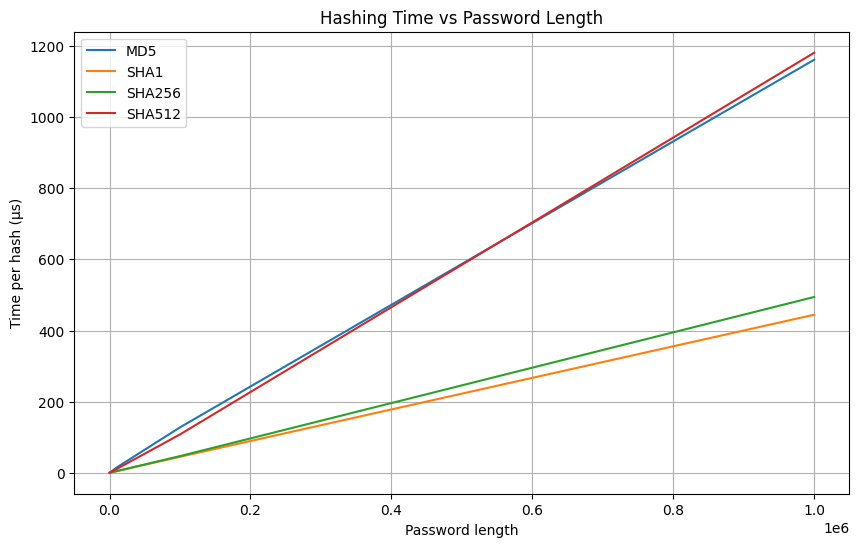

In [105]:
# plot กราฟ
lengths = [len(pw) for pw in long_passwords]
plt.figure(figsize=(10,6))
plt.plot(lengths, md5_times, label="MD5")
plt.plot(lengths, sha1_times, label="SHA1")
plt.plot(lengths, sha256_times, label="SHA256")
plt.plot(lengths, sha512_times, label="SHA512")

plt.xlabel("Password length")
plt.ylabel("Time per hash (µs)")
plt.title("Hashing Time vs Password Length")
plt.legend()
plt.grid(True)
plt.show()

In [106]:
print(f"{'Length':>10} {'MD5':>10} {'SHA1':>10} {'SHA256':>10} {'SHA512':>10}")
for l, m, s1, s256, s512 in zip(lengths, md5_times, sha1_times, sha256_times, sha512_times):
    print(f"{l:>10} {m:10.2f} {s1:10.2f} {s256:10.2f} {s512:10.2f}")

    Length        MD5       SHA1     SHA256     SHA512
       100       0.67       0.55       0.56       0.60
      1000       1.56       1.40       0.92       1.49
     10000      15.07       4.88       5.03      10.88
    100000     128.02      45.32      47.28     108.14
   1000000    1160.82     444.44     494.26    1180.42


In [ ]:
symbols = "`~!@#$%^&*()_+-=\{\}|[]\:\";'<>?,./"
number_of_char = len(string.ascii_letters + string.digits + symbols)
print(len(string.ascii_letters + string.digits + symbols))

96
34


<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
C:\Users\lucas\AppData\Local\Temp\ipykernel_6612\1222267948.py:1: SyntaxWarning: invalid escape sequence '\{'
  symbols = "`~!@#$%^&*()_+-=\{\}|[]\:\";'<>?,./"


In [110]:
year_mlsec = 366 * 24 * 60 * 60 * 1e6  # microseconds in a year

In [112]:
lengths = 1
while True:
    total_time = (number_of_char ** lengths) * bench(hashlib.sha1, generate_passwords(lengths), 1000)
    if(total_time > year_mlsec):
        print(f"The length of a proper password is {lengths} characters")
        break
    lengths += 1

The length of a proper password is 7 characters


Q4 If a given hash value is from a bcrypt algorithm, is it practical to do a brute-force attack?

ANS : No, based on the result from Q2, bcrypt algorithm is designed to counter brute-force strategy

Q5 If a given hash value is from a bcrypt algorithm, is it practical to perform a rainbow table attack?

ANS : No, because bcrypt still random salt so it is impossible to pre-calculate it 

Q6 You have to store a password in a database. Please explain your design/strategy for securely storing it.

ไม่เก็บ plain text เก็บเป็น hash only โดย function ใช้ bcrypt , salting (เหมือนจะไม่จำเป็นเพราะมี pack อยู่ใน hash function อยู่แแล้ว) cost factor ที่เหมาะสม ทำให้ brute-force และ rainbow table มีผลลัพธ์ที่แย่, database ก็อย่าลืม limit access และ เก็บ log ด้วย